In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
import string
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [149]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

In [35]:
restaurants_df = pd.read_csv('output/responses/cleaned_all_restaurants_dataset.csv')

In [36]:
restaurants_df.shape

(4510, 16)

In [37]:
restaurants = restaurants_df.copy()

In [5]:
reviews_df = pd.read_csv('output/responses/all_reviews_dataset.csv', low_memory=False)

In [6]:
reviews_df.shape

(4148074, 16)

In [7]:
reviews = reviews_df.copy()

# DO NOT RUN ANY DATA CLEANING CELLS

# Data Cleaning

## Drop unnnecessary columns

In [48]:
restaurants = restaurants.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [49]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10104 entries, 0 to 10103
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       10104 non-null  object 
 1   name           10104 non-null  object 
 2   reviews        10104 non-null  int64  
 3   main_category  10015 non-null  object 
 4   categories     10015 non-null  object 
 5   main_rating    10104 non-null  float64
 6   address        9992 non-null   object 
 7   link           10104 non-null  object 
 8   review_photos  10104 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 710.6+ KB


In [50]:
restaurants.shape

(10104, 9)

## Check NaN values and drop

In [51]:
restaurants.isnull().sum()

place_id           0
name               0
reviews            0
main_category     89
categories        89
main_rating        0
address          112
link               0
review_photos      0
dtype: int64

In [52]:
pd.set_option('display.max_rows', 20)

In [53]:
restaurants[restaurants['main_category'].isnull()]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
629,ChIJ-5iwVQsZ2jERDYQr5iyYDbI,Jia Sen Enterprise Pte Ltd,0,NaN,NaN,0.0,"3 Upper Pickering St, Singapore 058289",https://www.google.com/maps/place/Jia+Sen+Ente...,[]
630,ChIJR-uLmRIZ2jERB3x-oYjX6-8,Madar Maidin S/o Sen Mohd,0,NaN,NaN,0.0,"7 Maxwell Rd, Singapore 069111",https://www.google.com/maps/place/Madar+Maidin...,[]
646,ChIJu63tBLEZ2jER4BWy9m52vtI,Wei Fu Sen Trading,0,NaN,NaN,0.0,"23 Baghdad St, Singapore 199662",https://www.google.com/maps/place/Wei+Fu+Sen+T...,[]
650,ChIJl0y967gZ2jER61Sh6YJd_Yg,SEN PA GA Property,0,NaN,NaN,0.0,"Upper Dickson Rd, Singapore 207474",https://www.google.com/maps/place/SEN+PA+GA+Pr...,[]
653,ChIJE3D9Nysa2jERVnXUtHpekrE,Hoong Yong Sen Dr,0,NaN,NaN,0.0,"18 Jln Membina, Singapore 164018",https://www.google.com/maps/place/Hoong+Yong+S...,[]
...,...,...,...,...,...,...,...,...,...
9403,ChIJo5fvvQwZ2jERz_JUcD4fzkg,The Fortuna Growth Fund,0,NaN,NaN,0.0,Cross St,https://www.google.com/maps/place/The+Fortuna+...,[]
9406,ChIJAQCQ7BEa2jERtZBv8sMBJpk,Fortuna Hu Mover,0,NaN,NaN,0.0,"8 Empress Rd, Singapore 260008",https://www.google.com/maps/place/Fortuna+Hu+M...,[]
9412,ChIJ__-vj-8Z2jERhye3e6pRpaM,Fotia Pte. Ltd.,0,NaN,NaN,0.0,"271 Bukit Timah Rd, Singapore 259708",https://www.google.com/maps/place/Fotia+Pte.+L...,[]
9415,ChIJfaAGgMgZ2jERwVcV4SINwwg,The Four Sg,0,NaN,NaN,0.0,"18 Verdun Rd, Singapore 207280",https://www.google.com/maps/place/The+Four+Sg/...,[]


In [54]:
restaurants = restaurants.dropna()

In [55]:
restaurants.isnull().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

In [56]:
restaurants.shape

(9907, 9)

## Drop any duplicates

In [57]:
pd.set_option('display.max_rows', 10)

In [58]:
restaurants[restaurants.duplicated(keep=False)]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
33,ChIJ2-_9UgkZ2jERvURnZnvB8DM,旺爐 City Hot Pot @ One Raffles Place With Home ...,1398,Hot pot restaurant,"['Hot pot restaurant', 'Chinese restaurant', '...",4.6,"1 Raffles Pl, #04 - 26/27/28, Singapore 048616",https://www.google.com/maps/place/%E6%97%BA%E7...,['https://lh5.googleusercontent.com/p/AF1QipOw...
34,ChIJE2uZg3QZ2jERdDGp6DUaDdY,Ri Ri Hong Mala Xiang Guo,1546,Hawker Stall,['Hawker Stall'],4.0,"32 New Market Rd, #01-1036, Singapore 050032",https://www.google.com/maps/place/Ri+Ri+Hong+M...,['https://lh5.googleusercontent.com/p/AF1QipMR...
35,ChIJS2ibgn4X2jERBcHMaIRdBiw,Ri Ri Hong Mala Xiang Guo,33,Hawker Stall,['Hawker Stall'],3.7,"159A Hougang St 11, #01-02, Singapore 531159",https://www.google.com/maps/place/Ri+Ri+Hong+M...,['https://lh5.googleusercontent.com/p/AF1QipOL...
69,ChIJ13Gh1ioZ2jERmISnh_E9NNI,Roemah Makan,109,Indonesian restaurant,['Indonesian restaurant'],4.7,"531 Upper Cross St, #02-55 Hong Lim Complex, S...",https://www.google.com/maps/place/Roemah+Makan...,['https://lh5.googleusercontent.com/p/AF1QipNO...
77,ChIJEUU30zwP2jERK0y8vp6jboA,Rong Xing Hakka Yong Tau Fu,4,Hawker Stall,['Hawker Stall'],2.8,"3 Yung Sheng Rd, #03-120, Singapore 618499",https://www.google.com/maps/place/Rong+Xing+Ha...,['https://lh5.googleusercontent.com/p/AF1QipPG...
...,...,...,...,...,...,...,...,...,...
10098,ChIJ6-YzAysX2jERKmeXREbO7VM,Hualong Fishhead Steamboat,8,Chinese restaurant,['Chinese restaurant'],2.6,"Blk 631 Hougang Ave 8, #01-06, Singapore 530631",https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipOW...
10099,ChIJ0T6YJPkZ2jER4SLNFf4Zthg,炭香 Charcoal Fish Head Steamboat Kallang,490,Chinese restaurant,['Chinese restaurant'],4.1,"5 Kallang Pl, Singapore 339152",https://www.google.com/maps/place/%E7%82%AD%E9...,['https://lh5.googleusercontent.com/p/AF1QipM_...
10100,ChIJ6Y9kApkb2jERVPmthHd725A,Hualong Fishhead Steamboat,3,Coffee shop,['Coffee shop'],4.3,40 Margaret Dr,https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipNh...
10101,ChIJT49EoY0R2jERS0Ll4u0WxzU,HuaLong Fishhead Steamboat,45,Steamboat restaurant,"['Steamboat restaurant', 'Cafe', 'Coffee shop']",3.7,"155 Bukit Batok Street 11, #01-324, Singapore ...",https://www.google.com/maps/place/HuaLong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipPQ...


In [59]:
restaurants.drop_duplicates(inplace=True)

In [60]:
restaurants.shape

(7816, 9)

In [61]:
restaurants[restaurants.duplicated(subset=['place_id', 'name', 'reviews', 'address'])]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
11,ChIJd30Ooj4Z2jERnRDo8yBJBFs,Rempapa,551,Singaporean restaurant,['Singaporean restaurant'],4.2,"2 Paya Lebar Rd, #01-01/02/03 Park Place Resid...",https://www.google.com/maps/place/Rempapa/@1.3...,['https://lh5.googleusercontent.com/p/AF1QipPd...
79,ChIJL1wPThMZ2jER2SYqNpkbQ4w,Rong Xing Yong Tau Fu,51,Hawker Stall,['Hawker Stall'],3.6,"6 Tanjong Pagar Plz, #02-04, Singapore 081006",https://www.google.com/maps/place/Rong+Xing+Yo...,['https://lh5.googleusercontent.com/p/AF1QipO-...
97,ChIJ2aTh2yQX2jER-0StTda7ElM,Ru Lai Vegetarian food (Sin Ming Road),169,Hawker Stall,['Hawker Stall'],4.4,"24 Sin Ming Rd, #01-51, Singapore 571024",https://www.google.com/maps/place/Ru+Lai+Veget...,['https://lh5.googleusercontent.com/p/AF1QipPQ...
109,ChIJO_jq1K4Z2jERpTElH-AkV-0,SBCD Korean Tofu House (Millenia Walk),954,Korean restaurant,"['Korean restaurant', 'Restaurant']",4.0,"9 Raffles Boulevard, #01-114, Millenia Walk, S...",https://www.google.com/maps/place/SBCD+Korean+...,['https://lh5.googleusercontent.com/p/AF1QipOX...
110,ChIJ47Gk2dUb2jERwfnSotHkY-o,SBCD Korean Tofu House - Alexandra Retail Centre,273,Korean restaurant,['Korean restaurant'],4.0,"460 Alexandra Rd, #02-21 Alexandra Retail Cent...",https://www.google.com/maps/place/SBCD+Korean+...,['https://lh5.googleusercontent.com/p/AF1QipNJ...
...,...,...,...,...,...,...,...,...,...
10082,ChIJOe75OhQZ2jERg1rJsn5jEoA,House of Malaysia,38,Malaysian restaurant,['Malaysian restaurant'],3.6,"200 Jln Sultan, #01-25 Textile Centre, Singapo...",https://www.google.com/maps/place/House+of+Mal...,['https://lh5.googleusercontent.com/p/AF1QipPP...
10083,ChIJJR9auHAZ2jER8enAJuyfCyQ,House of Peranakan Petit,317,Nyonya restaurant,"['Nyonya restaurant', 'Asian restaurant', 'Res...",4.2,"42 Eng Hoon St, Estate 169785",https://www.google.com/maps/place/House+of+Per...,['https://lh5.googleusercontent.com/p/AF1QipNE...
10085,ChIJdwjQ2tQZ2jERFYU-5f1aW2g,Hoàng Hâu - Vietnamese Restaurant,239,Vietnamese restaurant,['Vietnamese restaurant'],4.6,"146 01, 1090 Jalan Bukit Merah, Block 146, 160146",https://www.google.com/maps/place/Ho%C3%A0ng+H...,['https://lh5.googleusercontent.com/p/AF1QipMC...
10088,ChIJxVQqvIwZ2jER4WhnK5h7S0g,Hua Ting Restaurant,721,Cantonese restaurant,"['Cantonese restaurant', 'Dim sum restaurant']",4.1,"Orchard Hotel Singapore, Level 2, 442 Orchard ...",https://www.google.com/maps/place/Hua+Ting+Res...,['https://lh5.googleusercontent.com/p/AF1QipOQ...


In [62]:
restaurants = restaurants.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

In [63]:
restaurants.shape

(6841, 9)

## Remove non-dining establishments

In [64]:
main_categories = list(restaurants['main_category'])
main_categories = list(set(main_categories))
main_categories.sort()

In [65]:
main_categories

['ATM',
 'Accountant',
 'Acupuncture clinic',
 'Advertising agency',
 'African restaurant',
 'After school program',
 'Air conditioning store',
 'Alcoholic beverage wholesaler',
 'American restaurant',
 'Andhra restaurant',
 'Anglican church',
 'Antique store',
 'Apartment building',
 'Apartment complex',
 'Arab restaurant',
 'Argentinian restaurant',
 'Art cafe',
 'Art center',
 'Art gallery',
 'Art museum',
 'Art studio',
 'Artistic handicrafts',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association / Organization',
 'Athletic field',
 'Auditor',
 'Australian restaurant',
 'Authentic Japanese restaurant',
 'Ayam penyet restaurant',
 'Açaí shop',
 'Baby store',
 'Bakery',
 'Bakso restaurant',
 'Ballet school',
 'Bank',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Barber shop',
 'Bazar',
 'Beauty product supplier',
 'Beauty salon',
 'Bed & breakfast',
 'Beer garden',
 'Bicycle club',
 'Bistro',
 'Book store',
 'Boutique',
 'Branding agency',
 'Brazilian restaurant',
 'Bre

In [66]:
len(main_categories)

490

In [68]:
non_dining_categories = [
    'ATM',
    'Accountant',
    'Acupuncture clinic',
    'Advertising agency',
    'After school program',
    'Air conditioning store',
    'Alcoholic beverage wholesaler',
    'Anglican church',
    'Antique store',
    'Apartment building',
    'Apartment complex',
    'Art center',
    'Art gallery',
    'Art museum',
    'Art studio',
    'Artistic handicrafts',
    'Association / Organization',
    'Athletic field',
    'Auditor',
    'Baby store',
    'Ballet school',
    'Bank',
    'Barber shop',
    'Bazar',
    'Beauty product supplier',
    'Beauty salon',
    'Bed & breakfast',
    'Bicycle club',
    'Book store',
    'Boutique',
    'Branding agency',
    'Bridal shop',
    'Bus Interchange',
    'Bus depot',
    'Business center',
    'Business management consultant',
    'Business to business service',
    'Butcher shop',
    'Camera store',
    'Camping Ground',
    'Candle store',
    'Car dealer',
    'Car wash',
    'Catholic church',
    'Cement manufacturer',
    'Charity',
    'Chartered accountant',
    "Children's clothing store",
    'Chinese language school',
    'Chocolate artisan',
    'Cinema',
    'Clothing store',
    'Club',
    'Commercial cleaning service',
    'Commercial real estate inspector',
    'Community garden',
    'Computer security service',
    'Computer store',
    'Computer support and services',
    'Condominium complex',
    'Confectionery store',
    'Construction company',
    'Consultant',
    'Contractor',
    'Convenience store',
    'Corporate gift supplier',
    'Corporate office',
    'Cosmetics and perfumes supplier',
    'Counselor',
    'Coworking space',
    'Credit counseling service',
    'Cultural association',
    'Curtain and upholstery cleaning service',
    'Dance school',
    'Dance store',
    'Day care center',
    'Day spa',
    'Dental clinic',
    'Department store',
    'Design agency',
    'Designer Clothing Shop',
    'Diving center',
    'E-commerce service',
    'Education center',
    'Educational institution',
    'Educational testing service',
    'Electronics manufacturer',
    'Electroplating Service',
    'Employment agency',
    'Employment center',
    'Employment consultant',
    'Engineer',
    'Event management company',
    'Event planner',
    'Event venue',
    'Family service center',
    'Farm shop',
    'Fashion accessories store',
    'Finance broker',
    'Financial consultant',
    'Financial institution',
    'Financial planner',
    'Fish store',
    'Florist',
    'Flower delivery',
    'Food and drink',
    'Food manufacturer',
    'Food manufacturing supply',
    'Food producer',
    'Food products supplier',
    'Freight forwarding service',
    'Fruit and vegetable wholesaler',
    'Fruit wholesaler',
    'Garden',
    'Garden center',
    'Gemologist',
    'General practitioner',
    'Gift shop',
    'Gold dealer',
    'Goldsmith',
    'Gourmet grocery store',
    'Government office',
    'Grocery store',
    'Gym and Fitness Centre',
    'HDB Flats',
    'Hair salon',
    'Hairdresser',
    'Hardware store',
    'Health and beauty shop',
    'Health food store',
    'Health spa',
    'Hematologist',
    'Heritage building',
    'Hiking area',
    'Holding company',
    'Homewares Store',
    'Hostel',
    'Hotel',
    'House cleaning service',
    'Housing development',
    'Ice supplier',
    'Importer',
    'Importer and Exporter',
    'Indian grocery store',
    'Indoor golf course',
    'Indoor playground',
    'Industrial equipment supplier',
    'Industry',
    'Information services',
    'Insurance',
    'Insurance company',
    'Interior designer',
    'Internet marketing service',
    'Italian grocery store',
    'Jeweler',
    'Jewelry store',
    'Karaoke bar',
    'Kiosk',
    'Kitchen',
    'Kitchen supply store',
    'Laboratory equipment supplier',
    'Language school',
    'Law firm',
    'Lawyer',
    'Learning center',
    'Legal services',
    'Lighting store',
    'Live music venue',
    'Local government office',
    'Lodging',
    'Lottery retailer',
    'Lounge',
    'Luggage store',
    'MRT/LRT Station',
    'Makerspace',
    'Manufacturer',
    'Market',
    'Marketing agency',
    'Marketing consultant',
    'Martial arts club',
    'Massage spa',
    'Maternity store',
    'Mattress store',
    'Media company',
    'Medical Center',
    'Medical clinic',
    'Medical equipment supplier',
    'Memorial estate',
    'Memorial park',
    'Mining company',
    'Monument maker',
    'Motorcycle rental agency',
    'Movie rental store',
    'Moving and storage service',
    'Muay Thai boxing gym',
    'Museum',
    'Music management and promotion',
    'Music producer',
    'Music school',
    'Nail salon',
    'National forest',
    'Non-governmental organization',
    'Non-profit organization',
    'Occupational therapist',
    'Optician',
    'Optometrist',
    'Oral surgeon',
    'Organic food store',
    'Otolaryngologist',
    'Park',
    'Parking lot',
    'Personal trainer',
    'Pest control service',
    'Pet Shop',
    'Pharmacy',
    'Photographer',
    'Photography',
    'Plant nursery',
    'Plastic products supplier',
    'Playground',
    'Police station',
    'Preschool',
    'Print shop',
    'Property Investment',
    'Property management company',
    'Public parking space',
    'Publisher',
    'Real estate agency',
    'Real estate agent',
    'Real estate consultant',
    'Recording studio',
    'Recruiter',
    'Religious destination',
    'Religious organization',
    'Restaurant supply store',
    'Scenic spot',
    'School',
    'Seafood wholesaler',
    'Self service restaurant',
    'Serviced accommodation',
    'Shipping and mailing service',
    'Shipping service',
    'Shoe Shop',
    'Shoe repair shop',
    'Shop',
    'Shopping mall',
    'Social club',
    'Software company',
    'Soup kitchen',
    'Souvenir store',
    'Sports bar',
    'Stationery store',
    'Supermarket',
    'Swimming school',
    'Tailor',
    'Taoist temple',
    'Tattoo and piercing shop',
    'Tattoo shop',
    'Tea store',
    'Tourist attraction',
    'Toy store',
    'Trading company',
    'Transportation service',
    'Travel agency',
    'Tutoring service',
    'Used clothing store',
    'Video production service',
    'Walk-in clinic',
    'Warehouse',
    'Waxing hair removal service',
    'Website designer',
    'Wedding photographer',
    'Wedding planner',
    'Wedding store',
    'Wedding venue',
    'Wellness center',
    'Wholesale bakery',
    'Wholesale food store',
    'Wholesaler',
    'Wine cellar',
    "Women's clothing store",
    'Yoga studio',
    'Youth Centre',
    'Açaí shop',
 'Bakery',
'Caterer',
 'Catering food and drink supplier',
 'Chinese Takeaway',
 'Chocolate shop',
'Coffee shop',
 'Coffee store',
 'Coffee wholesaler',
 'Delivery Restaurant',
 'Dog cafe',
 'Fast food restaurant',
 'Food court',
 'Frozen food store',
 'Furniture store',
 'Haute French restaurant',
 'Hawker Stall',
 'Hawker center',
 'Ice cream shop',
 'Industrial Real Estate Agency',
 'Japanese confectionery shop',
 'Japanese grocery store',
 'Pastry shop',
 'Performing arts group',
 'Performing arts theater',
 'Photography service',
 'Rice restaurant',
 'Salad shop',
 'Sandwich shop',
 'Tea and coffee shop',
 'Wellness program'
]

In [69]:
len(non_dining_categories)

314

In [353]:
non_dining_categories = [cat.lower() for cat in non_dining_categories]
mask = restaurants['main_category'].str.lower().isin(non_dining_categories)
restaurants = restaurants[~mask]
restaurants.shape

(4916, 9)

In [329]:
restaurants['main_category'].value_counts()

Restaurant                     973
Cafe                           382
Chinese restaurant             380
Indian restaurant              201
Japanese restaurant            192
                              ... 
Russian restaurant               1
African restaurant               1
Eastern European restaurant      1
Bakso restaurant                 1
Yemeni restaurant                1
Name: main_category, Length: 180, dtype: int64

## Fill In Actual Category for Significant Restaurants Which Only Have 'Restaurant' as Main Category

In [331]:
num_restaurants_by_categories = restaurants['main_category'].value_counts()
num_restaurants_by_categories

Restaurant                     745
Cafe                           350
Chinese restaurant             317
Indian restaurant              189
Japanese restaurant            176
                              ... 
Oyster bar restaurant            1
Cat cafe                         1
Eastern European restaurant      1
Kushiyaki restaurant             1
Yemeni restaurant                1
Name: main_category, Length: 167, dtype: int64

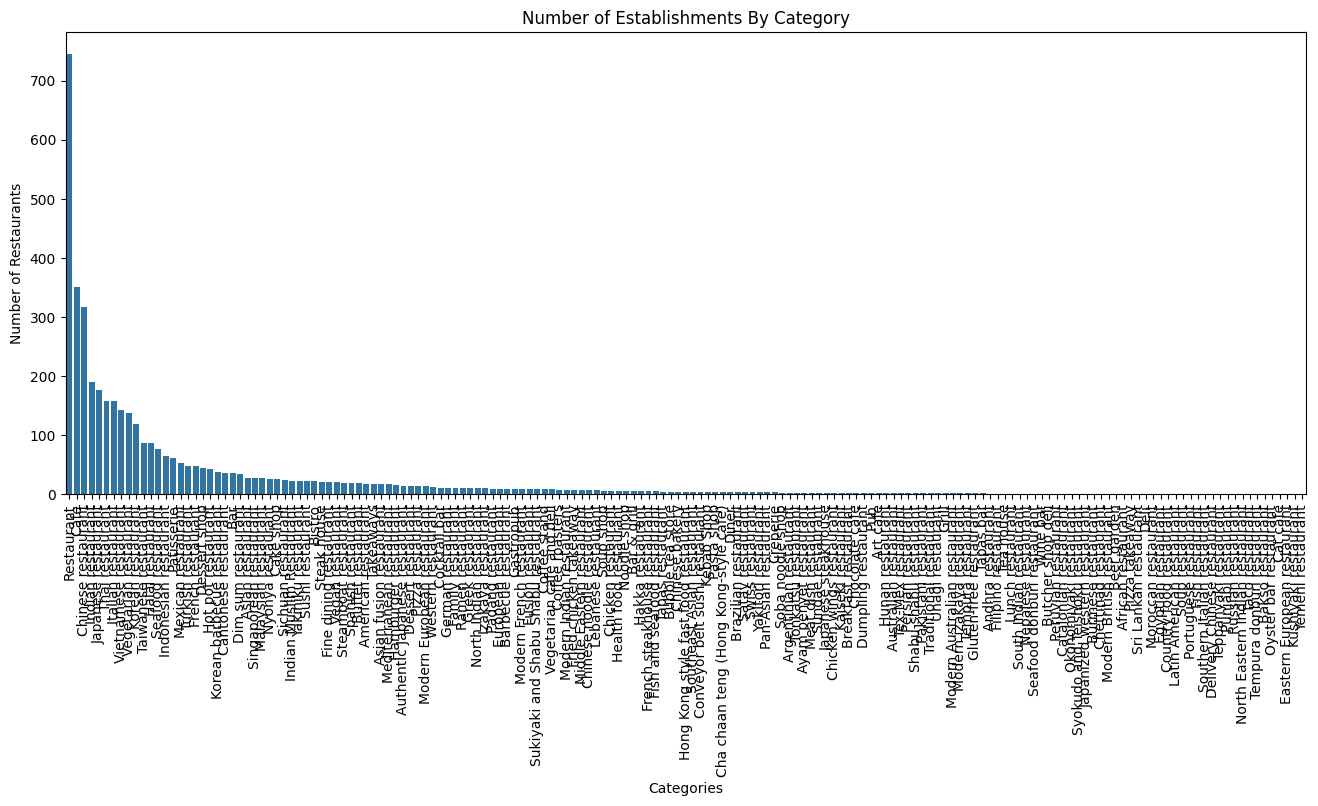

In [332]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

### Drop some weird places that were wrongly categorised as 'restaurants'

In [333]:
non_restaurants = ['Leila katheera', 'Dempsey Hill', 'Encik Tan', 'Tian Huat Rice Stall', 'Mr Teh Tarik Eating House', 'Shake Shack (Suntec)', 'Shake Shack 89 Neil Road', 'Shake Shack Great World']

In [334]:
restaurants[restaurants['name'].str.contains('Shake Shack')]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
708,ChIJK8BF048Z2jERnVlPOhTONCw,Shake Shack (Suntec),1541,Hamburger restaurant,"['Hamburger restaurant', 'Western restaurant']",4.3,"3 Temasek Boulevard, #01-357, Suntec City, Mal...",https://www.google.com/maps/place/Shake+Shack+...,['https://lh5.googleusercontent.com/p/AF1QipMC...
710,ChIJm49xXYkZ2jERkPB4-N9Cd6E,Shake Shack 89 Neil Road,1867,Hamburger restaurant,"['Hamburger restaurant', 'Western restaurant']",4.3,"89 Neil Rd, #01-01, Singapore 088849",https://www.google.com/maps/place/Shake+Shack+...,['https://lh5.googleusercontent.com/p/AF1QipOU...
711,ChIJ3Wov6ewZ2jERurlnr1wclU8,Shake Shack Great World,482,Hamburger restaurant,"['Hamburger restaurant', 'Western restaurant']",4.1,"1 Kim Seng Promenade, #01-101, Singapore 237994",https://www.google.com/maps/place/Shake+Shack+...,['https://lh5.googleusercontent.com/p/AF1QipNv...


In [367]:
restaurants = restaurants[~restaurants['name'].isin(non_restaurants)]
restaurants.shape

(3827, 16)

### For restaurants with a secondary category within 'categories', set that as the main category

In [336]:
pd.set_option('display.max_rows', 30)

In [368]:
restaurants[restaurants['main_category'] == 'Restaurant']

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,latitude,longtitude,full_postal_code,postal_code,district_code,region


In [369]:
restaurants['categories'] = restaurants['categories'].apply(lambda x: ast.literal_eval(x))

In [370]:
sec_cat_mask = (restaurants['main_category'] == 'Restaurant') & (restaurants['categories'].apply(lambda x: x != ['Restaurant']))
restaurants[sec_cat_mask]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,latitude,longtitude,full_postal_code,postal_code,district_code,region


In [371]:
restaurants.loc[sec_cat_mask, 'main_category'] = restaurants['categories'].apply(
    lambda x: x[1] if len(x) > 1 else x[0]
)

### For the remaining restaurants with only 'Restaurant' category, we drop those that have rating less than 4 and reviews less than 300, then manually change the category for the remaining ones

In [372]:
restaurants[(restaurants['main_category'] == 'Restaurant')]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,latitude,longtitude,full_postal_code,postal_code,district_code,region


In [373]:
mask_to_drop = (restaurants['main_category'] == 'Restaurant') & ((restaurants['reviews']<300) | (restaurants['main_rating']<4.0))

In [343]:
restaurants.shape

(4138, 9)

In [374]:
restaurants = restaurants.loc[~mask_to_drop]

In [375]:
restaurants.shape

(3827, 16)

In [376]:
sorted(list(restaurants[(restaurants['main_category'] == 'Restaurant')]['name']))

[]

In [92]:
# Manual mapping using ChatGPT
restaurant_recategorisation = {
    '109 Yong Tau Foo': 'Chinese restaurant',
    '15 Stamford': 'International restaurant',
    'Absurdities Singapore': 'Experimental cuisine restaurant',
    'Abundance: Taiwanese Restaurant & Craft Beer Bar (Redhill)': 'Taiwanese restaurant',
    'Ah Lock & Co': 'Singaporean restaurant',
    'Ajumma\'s Northpoint': 'Korean restaurant',
    'Ajumma\'s Westgate': 'Korean restaurant',
    'Alice Boulangerie & Restaurant': 'French bakery and restaurant',
    'Alijiang': 'Chinese restaurant',
    'Anglo Indian Cafe & Bar': 'Indian restaurant',
    'Arab Street Turkish & Western Restaurant': 'Turkish restaurant',
    'Ashoka Tandoor Family Restaurant': 'Indian restaurant',
    'Bacos': 'Western restaurant',
    'Bagus LaMian': 'Chinese restaurant',
    'Bearded Bella': 'Cafe',
    'Bugis BBQ and Hotpot': 'Chinese BBQ and Hotpot restaurant',
    'Caffe Fernet': 'Italian restaurant',
    'Charlie\'s Restaurant & Bar (Boat Quay)': 'Western restaurant',
    'Chef\'s Table by Chef Stephan (Western Omakase, Fine Dining)': 'Fine dining restaurant',
    'Chen\'s': 'Chinese restaurant',
    'Cherki': 'Peranakan restaurant',
    'Cherry & Oak': 'Fusion restaurant',
    'Chuan Kee Seafood': 'Chinese seafood restaurant',
    'Comida Mexicana Singapore': 'Mexican restaurant',
    'D\'Penyetz Jem': 'Indonesian restaurant',
    'DaXi 大喜 - VivoCity': 'Chinese restaurant',
    'Dum Pukht Grill & Curry': 'Indian restaurant',
    'Eden Restaurant': 'International restaurant',
    'Estuary Seafood Restaurant Bar - Event Space Orchard Road': 'Seafood restaurant',
    'Fairytail Bar - By The Halal Mixologist': 'Bar',
    'Feng Sheng Kampong Chicken Rice & Steamboat (24 Hours) | 豐盛滑鸡火锅': 'Chinese restaurant',
    'Frieda Beer Garden & German Restaurant': 'German restaurant',
    'GLC Hao Yun Lai Restaurant (好运来餐厅）': 'Chinese restaurant',
    'Galangal': 'Thai restaurant',
    'Genius Central Singapore': 'Healthy dining restaurant',
    'Gold Ocean Curry Fish Head': 'Indian restaurant',
    'Good Luck BBQ 上上签四川小酒馆': 'Chinese BBQ restaurant',
    'Great Nanyang Heritage Cafe 大南洋': 'Singaporean restaurant',
    'Hahahotpot Jalan Pisang': 'Hotpot restaurant',
    'Hopscotch (Capitol)': 'Bar and restaurant',
    'Huda Restaurant SG 胡大饭店': 'Chinese restaurant',
    'Humpback': 'Seafood restaurant',
    'JAAN By Kirk Westaway': 'French fine dining restaurant',
    'Jason Niang Dou Fu': 'Chinese restaurant',
    'Jia Xiang Sarawak Kuching Kolo Mee': 'Malaysian restaurant',
    'Jiak Modern Tzechar @ Hillv2': 'Chinese restaurant',
    'Josh\'s Grill': 'Western restaurant',
    'Joséphine - French Cuisine & Wine Bar': 'French restaurant',
    'Korat Thai Cafe': 'Thai restaurant',
    'Kubo Wood-fired Cuisine & Wine Bar': 'Filipino restaurant',
    'La Mensa Multi Cuisine': 'International restaurant',
    'Lazy Lizard - Flora Vista': 'Western restaurant',
    'Lepak at Sultan': 'Cafe',
    'Lime Restaurant': 'International buffet restaurant',
    'Lolla': 'Mediterranean restaurant',
    'Làng Nướng 1980\'s - Authentic Vietnamese home-cooked Cuisine': 'Vietnamese restaurant',
    'Madame Fan': 'Chinese restaurant',
    'Makan@Jen': 'Buffet restaurant',
    'Man Man Japanese Unagi (Clarke Quay)': 'Japanese restaurant',
    'Meta Restaurant': 'Modern European restaurant',
    'Nyonyas & Gentlemen Restaurant': 'Peranakan restaurant',
    'ODETTE': 'French fine dining restaurant',
    'Odette': 'French fine dining restaurant',
    'Old Bibik\'s Peranakan Kitchen': 'Peranakan restaurant',
    'Olive Vine Pasta Fusion': 'Italian fusion restaurant',
    'Olivia Restaurant & Lounge': 'Spanish restaurant',
    'Oscar\'s': 'Buffet restaurant',
    'Overrice (Voted Best Halal Restaurant near Haji Lane)': 'Middle Eastern restaurant',
    'Papa Ayam 313@somerset': 'Indonesian restaurant',
    'Pastaria Abate': 'Italian restaurant',
    'Penang Culture': 'Malaysian restaurant',
    'Podi & Poriyal': 'Indian restaurant',
    'Putra Minang Restaurant Bencoolen': 'Indonesian restaurant',
    'Qi - House of Sichuan': 'Chinese restaurant',
    'RACINES': 'French and Chinese restaurant',
    'Ristorante Vista Duomo': 'Italian restaurant',
    'SKAI Restaurant': 'Grill restaurant',
    'San Laksa Steamboat Pte Ltd': 'Chinese restaurant',
    'San Shu Gong Private Dining 三叔公私房菜': 'Chinese restaurant',
    'Sanook Kitchen - City Square': 'Thai restaurant',
    'Selera Serambi by Tang Tea House': 'Malay restaurant',
    'Sibarita Habana': 'Spanish restaurant',
    'Sibarita Restaurante': 'Spanish restaurant',
    'Sinpopo Brand Restaurant @ TANGS': 'Singaporean restaurant',
    'Siri House Dempsey': 'Contemporary restaurant',
    'Sum Dim Sum (Bedok)': 'Chinese restaurant',
    'Sum Dim Sum (Punggol)': 'Chinese restaurant',
    'Summer Hill': 'French restaurant',
    'Synthesis 食拿酒稳: Modern Chinese Restaurant & Cocktail Bar (Suntec City)': 'Chinese restaurant',
    'TAP @ 9 Penang': 'Tapas restaurant',
    'Tapas,24 Singapore': 'Spanish restaurant',
    'The Beef House': 'Steakhouse',
    'The Curry Wok (TCW)': 'Indian restaurant',
    'The Dempsey Project': 'International restaurant',
    'The French Ladle': 'French restaurant',
    'The Guild': 'Bar and restaurant',
    'The Halia at Singapore Botanic Gardens': 'Modern European restaurant',
    'The Mask Restaurant and Bar': 'Western restaurant',
    'The Orchard Cafe': 'International buffet restaurant',
    'Thevar': 'Indian fusion restaurant',
    'Thien Long Vietnamese Food': 'Vietnamese restaurant',
    'Tian Tian You Yu 天天友魚': 'Chinese seafood restaurant',
    'Tiffin Room': 'Indian restaurant',
    'Tilly\'s by Butcher Boy': 'Western restaurant',
    'Ting Yuan Hotpot Buffet': 'Chinese hotpot restaurant',
    'Tash Tish Tosh @ 50K': 'Halal restaurant',
    'Town Restaurant': 'International buffet restaurant',
    'True Cost': 'International restaurant',
    'VENUE By Sebastian': 'Modern European restaurant',
    'VIETSEA® I - VUA LẨU': 'Vietnamese hotpot restaurant',
    'WAKUDA': 'Japanese restaurant',
    'WINESTONE': 'Western restaurant',
    'Waroeng Anak Indo': 'Indonesian restaurant',
    'Wild Coco (Hamilton Road)': 'Fusion restaurant',
    'Ya Ge - 雅阁 (Orchid Hotel SG)': 'Chinese restaurant',
    'Yang Guo Fu Mala Tang 杨国福麻辣烫 @ Northpoint City': 'Chinese restaurant',
    'YinJi Singapore': 'Chinese restaurant',
    'Yì By Jereme Leung': 'Chinese fine dining restaurant',
    'fennel by komala vilas': 'Indian restaurant',
    'ilmiri Korean Fusion Cuisine': 'Korean restaurant',
    '蜀都丰 SO DO FUN @ MIDTOWN HOUSE': 'Chinese restaurant',
    '辣不辣 Labula BBQ Sichuan Restaurant @ Hougang Village': 'Chinese BBQ restaurant'
}

In [377]:
restaurant_cat_mask = (restaurants['main_category'] == 'Restaurant')
restaurants[restaurant_cat_mask]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,latitude,longtitude,full_postal_code,postal_code,district_code,region


In [378]:
restaurants.loc[restaurant_cat_mask, 'main_category'] = restaurants['name'].apply(lambda x: restaurant_recategorisation.get(x, 'Restaurant'))

In [379]:
restaurants[(restaurants['main_category'] == 'Restaurant')]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,latitude,longtitude,full_postal_code,postal_code,district_code,region


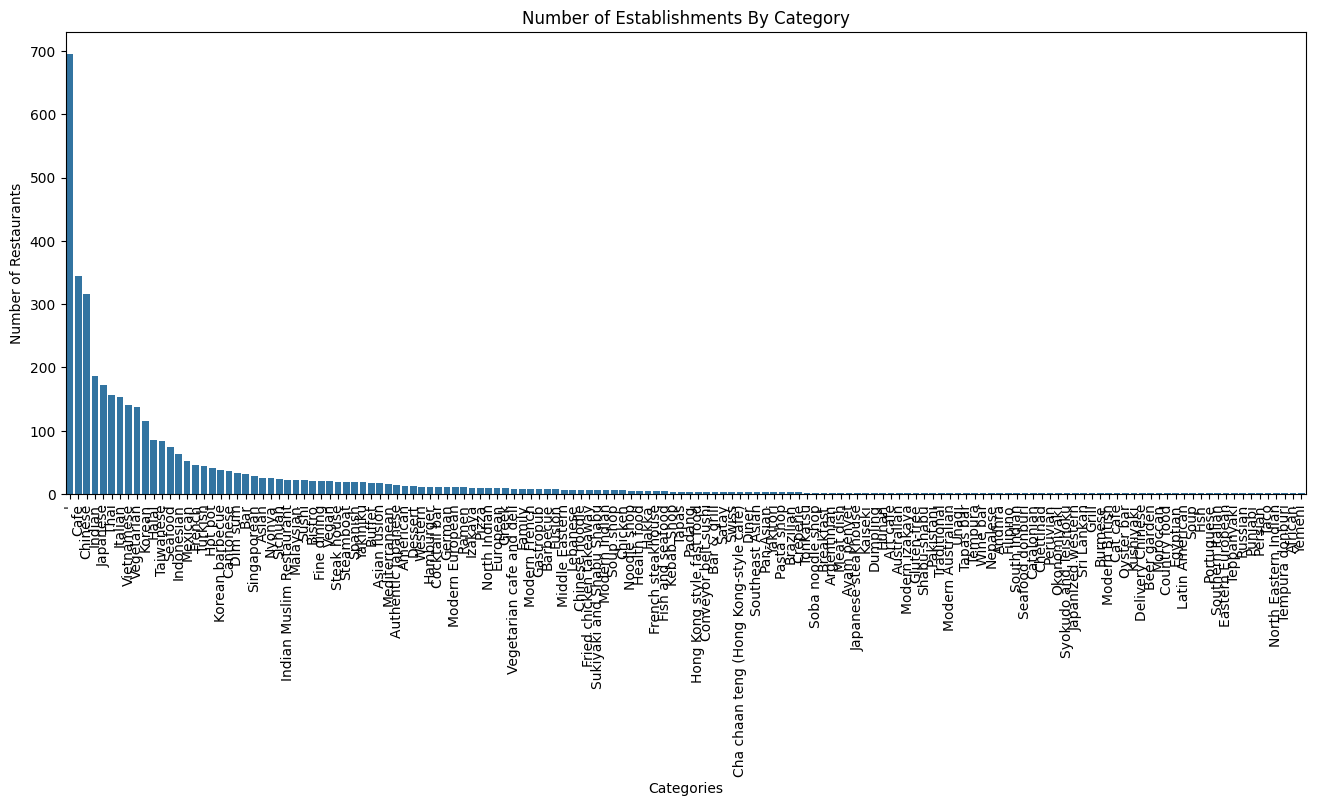

In [381]:
num_restaurants_by_categories = restaurants['main_category'].value_counts()
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

### Map the main categories to cuisines and add as new column

In [39]:
set(restaurants.main_category)

{'African',
 'American',
 'Andhra',
 'Argentinian',
 'Art cafe',
 'Art gallery',
 'Asian',
 'Asian fusion',
 'Australian',
 'Authentic Japanese',
 'Ayam penyet',
 'Açaí shop',
 'Bakery',
 'Bar',
 'Bar & grill',
 'Bar and',
 'Barbecue',
 'Basque',
 'Beer garden',
 'Beer store',
 'Biryani',
 'Bistro',
 'Brasserie',
 'Brazilian',
 'Breakfast',
 'Brunch',
 'Buffet',
 'Burmese',
 'Cafe',
 'Cake shop',
 'Cantonese',
 'Cat cafe',
 'Catalonian',
 'Caterer',
 'Catering food and drink supplier',
 'Cha chaan teng (Hong Kong-style cafe)',
 'Chettinad',
 'Chicken',
 'Chinese',
 'Chinese BBQ',
 'Chinese BBQ and Hotpot',
 'Chinese Takeaway',
 'Chinese fine dining',
 'Chinese hotpot',
 'Chinese noodle',
 'Chinese seafood',
 'Cocktail bar',
 'Coffee shop',
 'Coffee store',
 'Contemporary',
 'Conveyor belt sushi',
 'Country food',
 'Crab house',
 'Creperie',
 'Delivery Chinese',
 'Delivery service',
 'Dessert',
 'Dim sum',
 'Diner',
 'Dumpling',
 'Eastern European',
 'Egyptian',
 'European',
 'Event ven

In [130]:
category_to_cuisine2 = {
    'African': 'African',
    'American': 'American',
    'Andhra': 'Indian',
    'Argentinian': 'Latin American',
    'Art cafe': 'Cafe',
    'Asian': 'Asian',
    'Asian fusion': 'Fusion',
    'Australian': 'Australian',
    'Authentic Japanese': 'Japanese',
    'Bakso': 'Indonesian',
    'Bar': 'Bar',
    'Bar & grill': 'Bar',
    'Barbecue': 'Barbecue',
    'Basque': 'Spanish',
    'Biryani': 'Indian',
    'Bistro': 'Casual',
    'Brasserie': 'Casual',
    'Brazilian': 'Latin American',
    'Breakfast': 'Cafe',
    'Brunch': 'Cafe',
    'Buffet': 'Buffet',
    'Cafe': 'Cafe',
    'Café': 'Cafe',
    'Cantonese': 'Chinese',
    'Cat cafe': 'Cafe',
    'Catalonian': 'Spanish',
    'Cha chaan teng (Hong Kong-style cafe)': 'Chinese',
    'Chettinad': 'Indian',
    'Chicken': 'Casual',
    'Chinese': 'Chinese',
    'Chinese noodle': 'Chinese',
    'Cocktail bar': 'Bar',
    'Conveyor belt sushi': 'Japanese',
    'Crab house': 'Seafood',
    'Creperie': 'French',
    'Delivery Chinese': 'Chinese',
    'Dessert': 'Dessert',
    'Dim sum': 'Chinese',
    'Diner': 'American',
    'Dumpling': 'Chinese',
    'Eastern European': 'Eastern European',
    'European': 'European',
    'Family': 'Family',
    'Filipino': 'Asian',
    'Fine dining': 'Fine dining',
    'Fish and seafood': 'Seafood',
    'French': 'French',
    'French steakhouse': 'French',
    'Fried chicken takeaway': 'Casual',
    'Fusion': 'Fusion',
    'Gastropub': 'Casual',
    'German': 'German',
    'Gluten-free': 'Health food',
    'Greek': 'Mediterranean',
    'Grill': 'Barbecue',
    'Hakka': 'Chinese',
    'Halal': 'Halal',
    'Hamburger': 'Casual',
    'Health food': 'Health food',
    'Hong Kong style fast food': 'Chinese',
    'Hot pot': 'Chinese',
    'Hunan': 'Chinese',
    'Indian': 'Indian',
    'Indian Muslim Restaurant': 'Indian',
    'Indonesian': 'Indonesian',
    'International': 'International',
    'Israeli': 'Middle Eastern',
    'Italian': 'Italian',
    'Izakaya': 'Japanese',
    'Japanese': 'Japanese',
    'Japanese steakhouse': 'Japanese',
    'Japanized western': 'Fusion',
    'Kaiseki': 'Japanese',
    'Kebab Shop': 'Middle Eastern',
    'Korean': 'Korean',
    'Korean barbecue': 'Korean',
    'Kushiyaki': 'Japanese',
    'Latin American': 'Latin American',
    'Lebanese': 'Middle Eastern',
    'Local': 'Local',
    'Malaysian': 'Local',
    'Meat dish': 'Barbecue',
    'Mediterranean': 'Mediterranean',
    'Mexican': 'Mexican',
    'Middle Eastern': 'Middle Eastern',
    'Modern Australian': 'Australian',
    'Modern European': 'European',
    'Modern French': 'French',
    'Modern Indian': 'Indian',
    'Modern izakaya': 'Japanese',
    'Moroccan': 'Middle Eastern',
    'Nepalese': 'Asian',
    'Noodle shop': 'Asian',
    'North Eastern Indian': 'Indian',
    'North Indian': 'Indian',
    'Nyonya': 'Peranakan',
    'Okonomiyaki': 'Japanese',
    'Oyster bar': 'Seafood',
    'Padang': 'Indonesian',
    'Pakistani': 'Asian',
    'Pan-Asian': 'Asian',
    'Pasta shop': 'Italian',
    'Peranakan': 'Peranakan',
    'Persian': 'Middle Eastern',
    'Peruvian': 'Latin American',
    'Pizza': 'Italian',
    'Portuguese': 'Mediterranean',
    'Punjabi': 'Indian',
    'Ramen': 'Japanese',
    'Russian': 'Eastern European',
    'Satay': 'Local',
    'Seafood': 'Seafood',
    'Seafood donburi': 'Japanese',
    'Shabu-shabu': 'Japanese',
    'Sichuan': 'Chinese',
    'Singaporean': 'Local',
    'Soba noodle shop': 'Japanese',
    'Soup': 'Casual',
    'Soup shop': 'Casual',
    'Southeast Asian': 'Local',
    'Southern Italian': 'Italian',
    'Spanish': 'Spanish',
    'Sri Lankan': 'Asian',
    'Steak house': 'Western',
    'Steamboat': 'Asian',
    'Sukiyaki and Shabu Shabu': 'Japanese',
    'Sushi': 'Japanese',
    'Sweets and dessert buffet': 'Dessert',
    'Swiss': 'European',
    'Syokudo and Teishoku': 'Japanese',
    'Taco': 'Mexican',
    'Taiwanese': 'Asian',
    'Tapas': 'Spanish',
    'Tapas bar': 'Spanish',
    'Tempura': 'Japanese',
    'Tempura donburi': 'Japanese',
    'Teppanyaki': 'Japanese',
    'Tex-Mex': 'Mexican',
    'Thai': 'Thai',
    'Tonkatsu': 'Japanese',
    'Traditional': 'Family',
    'Turkish': 'Middle Eastern',
    'Unagi': 'Japanese',
    'Vegan': 'Health food',
    'Vegetarian': 'Health food',
    'Vegetarian cafe and deli': 'Health food',
    'Vietnamese': 'Asian',
    'Western': 'Western',
    'Wine bar': 'Bar',
    'Yakiniku': 'Japanese',
    'Yakitori': 'Japanese'
}

In [131]:
len(category_to_cuisine2)

151

In [42]:
restaurants['cuisine'] = restaurants['main_category'].apply(lambda x: category_to_cuisine[x])

In [43]:
restaurants.sample(10)

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,latitude,longtitude,full_postal_code,postal_code,district_code,region,cuisine
4010,ChIJMY5HWRgZ2jERlkKe9lqTy5I,DAWN,226,Cafe,"['Cafe', 'Coffee shop']",4.0,"78 South Bridge Rd, Singapore 058708",https://www.google.com/maps/place/DAWN/data=!4...,['https://lh5.googleusercontent.com/p/AF1QipMk...,"[1.2869124, 103.8478714]",1.286912,103.847871,58708,5,1,City,Cafe
4006,ChIJx_0Zje0Z2jER65Dro1YNoRw,Cédric Grolet Singapore,781,Bakery,"['Restaurant', 'Bakery', 'Pastry shop']",3.7,"30 Bideford Rd, Level 1 COMO Orchard, Singapor...",https://www.google.com/maps/place/C%C3%A9dric+...,['https://lh5.googleusercontent.com/p/AF1QipOE...,"[1.3042127, 103.8367744]",1.304213,103.836774,229922,22,9,Central,Bakery
2361,ChIJw51YdBIZ2jERoa5GzNLFYvk,JUMBO Seafood - The Riverwalk,1470,Seafood,"['Seafood restaurant', 'Restaurant']",4.7,"20 Upper Circular Rd, #B1-48 The Riverwalk, Si...",https://www.google.com/maps/place/JUMBO+Seafoo...,['https://lh5.googleusercontent.com/p/AF1QipOC...,"[1.2892125, 103.8483045]",1.289213,103.848304,58416,5,1,City,Seafood
4025,ChIJJ2b_-MM92jERX9O7FKfuL6s,Dalcomhan Bam Korean Restaurant East Village,146,Korean,['Korean restaurant'],4.2,"430 Upper Changi Rd, #01-66 East Village, Sing...",https://www.google.com/maps/place/Dalcomhan+Ba...,['https://lh5.googleusercontent.com/p/AF1QipPn...,"[1.3319849, 103.9461517]",1.331985,103.946152,487048,48,16,East,Korean
3701,ChIJr-F2OcsZ2jER1dc6R4c2OMU,Boeuf: Top 10 Best Steak & Wine Restaurant In CBD,458,Meat dish,"['Meat dish restaurant', 'Restaurant']",4.3,"159 Telok Ayer St, Singapore 068614",https://www.google.com/maps/place/Boeuf:+Top+1...,['https://lh5.googleusercontent.com/p/AF1QipMC...,"[1.2803502, 103.8475421]",1.280350,103.847542,68614,6,1,City,Barbecue
3534,ChIJZdXmRUUa2jERxPXzn5j8JVE,Arkadas Cafe & Restaurant,871,Turkish,"['Turkish restaurant', 'Halal restaurant', 'Me...",4.4,"1 Fusionopolis Vw, #01-02, Eclipse 138577",https://www.google.com/maps/place/Arkadas+Cafe...,['https://lh5.googleusercontent.com/p/AF1QipPI...,"[1.2998502, 103.7897602]",1.299850,103.789760,138577,13,5,West,Middle Eastern
1085,ChIJrah_A8EZ2jERbHPXr0FZiU8,THE MAST' of Mozzarella & Co,146,Italian,['Italian restaurant'],4.3,"182 Cecil St, #01-05/08 Frasers Tower, Singapo...",https://www.google.com/maps/place/THE+MAST'+of...,['https://lh5.googleusercontent.com/p/AF1QipPl...,"[1.2789668, 103.8471749]",1.278967,103.847175,69547,6,1,City,Italian
2114,ChIJ3Sk7k68Z2jERQVUj_DfCyqA,重庆正宗老火锅 Chong Qin (Ori) Steamboat,287,Buffet,['Buffet restaurant'],3.8,"Beach Rd, #01-02 Chye Sing Building, 87, Singa...",https://www.google.com/maps/place/%E9%87%8D%E5...,['https://lh5.googleusercontent.com/p/AF1QipOY...,"[1.2973481, 103.856731]",1.297348,103.856731,189695,18,7,City,Buffet
2517,ChIJz9smgg0Z2jERxiQ6muKAKt0,Kamal's Restaurant,216,Indian Muslim Restaurant,['Indian Muslim Restaurant'],4.2,"7 Stanley St, Singapore 068726",https://www.google.com/maps/place/Kamal's+Rest...,['https://lh5.googleusercontent.com/p/AF1QipPV...,"[1.2800619, 103.8478341]",1.280062,103.847834,68726,6,1,City,Indian
4433,ChIJh6wGosEb2jERuTRX9vxr13c,Hathaway,461,Asian,"['Restaurant', 'Asian restaurant', 'South Asia...",4.4,"Block 13 Dempsey Rd, #01-07, Singapore 249674",https://www.google.com/maps/place/Hathaway/@1....,['https://lh5.googleusercontent.com/p/AF1QipMk...,"[1.30449, 103.8104586]",1.304490,103.810459,249674,24,10,Central,Asian


In [46]:
len(set(restaurants['cuisine']))

41

# Now let's clean the Reviews Dataset

In [8]:
reviews.shape

(4148074, 16)

## Drop duplicates

In [9]:
reviews[reviews.duplicated(keep=False)]

,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
836579,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSURWbjRmMXZBRRAB,3,Having stemwd snapper fish head with black bea...,8 months ago,2023-12-29 18:27:00.933321,0,NaN,NaN,NaN,2.0,NaN,False,NaN,NaN
836580,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUNsa3AzX3pnRRAB,4,Good Zhi char esp tomato noodles and steam fis...,9 months ago,2023-11-29 18:27:00.938167,0,NaN,NaN,NaN,506.0,3801.0,True,NaN,NaN
836581,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUM1b2F1ZGpnRRAB,5,Very economical. Fish steamboat with about 11 ...,10 months ago,2023-10-29 18:27:00.942938,0,NaN,NaN,NaN,114.0,259.0,True,NaN,NaN
836582,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSURaa1B5Mi13RRAB,1,Nothing special only their service attitude is...,11 months ago,2023-09-29 18:27:00.946329,0,NaN,NaN,NaN,166.0,67.0,True,NaN,NaN
836583,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUNaOThYTlRREAE,5,"Bill $100 for 5 adults, reasonae. Fish soup is...",11 months ago,2023-09-29 18:27:00.949322,0,NaN,NaN,NaN,84.0,42.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942836,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChdDSUhNMG9nS0VJQ0FnSUMwN3NtRDdnRRAB,3,"The fish head steamnoat soup is delious, with ...",4 years ago,2020-08-29 18:27:04.061687,1,NaN,NaN,NaN,47.0,95.0,True,NaN,NaN
1942837,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUMwN3M3bEVBEAE,4,"Excellent char Kueh teow, yuan Yang horfun, on...",4 years ago,2020-08-29 18:27:04.487137,0,NaN,NaN,NaN,773.0,2217.0,True,NaN,NaN
1942838,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUMwN3ZhaEtBEAE,4,Great addition to Turf City. If you like Fish ...,4 years ago,2020-08-29 18:27:04.491038,0,NaN,NaN,NaN,283.0,1552.0,True,NaN,NaN
1942839,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,ChZDSUhNMG9nS0VJQ0FnSUNVNy1UeWRBEAE,1,"Seriously if you want a good meal, don t try h...",5 years ago,2019-08-29 18:27:04.494468,0,NaN,NaN,NaN,12.0,11.0,False,NaN,NaN


In [10]:
reviews.drop_duplicates(inplace=True)

In [11]:
reviews.shape

(4148000, 16)

## Check NaN values and drop rows

In [12]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                            1478245
published_at                                 0
published_at_date                            7
review_likes_count                           0
response_from_owner_text               3337590
response_from_owner_ago                3334274
response_from_owner_date               3334275
total_number_of_reviews_by_reviewer     180433
total_number_of_photos_by_reviewer     1305320
is_local_guide                          175956
review_translated_text                 3938819
response_from_owner_translated_text    4128855
dtype: int64

### Drop rows where review_text is NaN

In [13]:
reviews = reviews.dropna(subset=['review_text', 'published_at_date'])

In [14]:
reviews.shape

(2669755, 16)

In [15]:
reviews.isnull().sum()

place_id                                     0
name                                         0
review_id                                    0
rating                                       0
review_text                                  0
published_at                                 0
published_at_date                            5
review_likes_count                           0
response_from_owner_text               2056564
response_from_owner_ago                2055006
response_from_owner_date               2055007
total_number_of_reviews_by_reviewer       5623
total_number_of_photos_by_reviewer      711273
is_local_guide                            5617
review_translated_text                 2460577
response_from_owner_translated_text    2655052
dtype: int64

In [24]:
reviews = reviews.dropna(subset=['published_at_date'])

### Drop unnecessary columns

In [16]:
reviews = reviews.drop(columns=['review_translated_text', 'response_from_owner_translated_text', 'response_from_owner_ago', 'response_from_owner_date', 'published_at'])

In [17]:
reviews.shape

(2669755, 11)

### Change remaining NaN to empty string or zero

In [18]:
reviews.sample(10)

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
1910101,ChIJg0i3JI8j2jERECzKAFpEydU,La Saigon,ChdDSUhNMG9nS0VJQ0FnSUR4c0xubmxRRRAB,5,Sweet potato cake with right tinge of sweetnes...,2023-08-30 01:16:52.064905,0,Thank you so much ;),4.0,4.0,False
2737220,ChIJqYP4h6kiTIYR7WKqmze-PuA,Salsa Tex-Mex Plano Texas,ChdDSUhNMG9nS0VJQ0FnSUNnN1BLMHd3RRAB,5,Excellent service and very delicious food,2019-08-30 16:39:36.429915,0,NaN,1.0,NaN,False
769602,ChIJNdCjg4cZ2jERSt74lXifcjE,The Malayan Council,ChZDSUhNMG9nS0VJQ0FnSUNONDRPekl3EAE,5,Amazing service from Mimi today! We appreciate...,2024-01-29 13:22:42.728528,0,NaN,7.0,NaN,False
2459825,ChIJCYpAP2DmaC4RshB4KjZqULA,Paris Van Java,ChdDSUhNMG9nS0VJQ0FnSUNpdDkycXh3RRAB,5,The place is cool,2021-08-30 10:07:35.746517,0,NaN,6.0,257.0,True
1701884,ChIJ5yTs-pYZ2jERSba6hp5oQMQ,FoodLine.sg,ChdDSUhNMG9nS0VJQ0FnSURVMFlLSnJRRRAB,5,Good,2019-08-29 20:27:58.817144,0,NaN,7.0,NaN,False
1190347,ChIJJ1mjFgoX2jERg4CKJG6wwt8,旺爐 City Hot Pot @ Sengkang Grand Mall,ChdDSUhNMG9nS0VJQ0FnSUNEb2JTcHFBRRAB,5,Service was great!,2024-03-30 03:02:30.913847,0,NaN,1.0,NaN,False
3912447,ChIJO-dbW5gZ2jERdPfaLw9jEMQ,𝗔𝗪𝗔𝗗𝗛 | Royal Indian Dining & Lounge,ChdDSUhNMG9nS0VJQ0FnSUNwdDl2Ui13RRAB,5,Thanks Rishab for recommending and service. Gr...,2023-08-31 10:19:04.934578,0,NaN,29.0,34.0,True
649315,ChIJ0ZPx-S8Z2jERpKHHjVP4vjE,Eat 3 Bowls @ Bendemeer,ChdDSUhNMG9nS0VJQ0FnSURPNTRiRC1nRRAB,5,Ordered the lu rou fan set and also the beancu...,2022-08-29 12:44:04.171563,0,NaN,528.0,568.0,True
916813,ChIJGXoEwloZ2jERIUSR4jA7ogQ,Ah Lock & Co,ChZDSUhNMG9nS0VJQ0FnSUN4azRiT2ZREAE,5,"Fantastic customer service, good food.",2023-08-29 16:54:34.007565,0,NaN,2.0,NaN,False
1312696,ChIJv6v6SscZ2jERkx2BLngjhyY,Vietsea II - Xom Nhau,ChdDSUhNMG9nS0VJQ0FnSUNaNmU3ajZnRRAB,5,good,2023-09-30 14:19:08.788901,0,NaN,1.0,NaN,False


In [19]:
reviews['is_local_guide'] = reviews['is_local_guide'].fillna(False)  

In [20]:
reviews[['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer']] = reviews[['total_number_of_photos_by_reviewer', 'total_number_of_reviews_by_reviewer']].fillna(0)  

In [21]:
reviews['response_from_owner_text'] = reviews['response_from_owner_text'].fillna("")  

In [26]:
reviews.isnull().sum()

place_id                               0
name                                   0
review_id                              0
rating                                 0
review_text                            0
published_at_date                      0
review_likes_count                     0
response_from_owner_text               0
total_number_of_reviews_by_reviewer    0
total_number_of_photos_by_reviewer     0
is_local_guide                         0
dtype: int64

# Establish the Consideration Set

### Only keep restaurants >= 3.7 rating and >= 75 reviews and <= 2000 reviews

In [88]:
restaurants = restaurants[(restaurants['main_rating'] >= 3.7) & (restaurants['reviews'] >= 75) & (restaurants['reviews'] <= 2000)]

### Only keep reviews with published_at date from 1 Jan 2023

In [27]:
type(list(reviews['published_at_date'])[0])

str

In [28]:
# Convert the 'published_at_date' column to datetime and simplify to just date
reviews['published_at_date'] = pd.to_datetime(reviews['published_at_date'])
reviews['published_at_date'] = reviews['published_at_date'].dt.date
print(reviews['published_at_date'])

0          2024-08-15
1          2024-08-08
2          2024-08-08
3          2024-07-29
4          2024-06-29
              ...    
4148069    2016-08-30
4148070    2016-08-30
4148071    2016-08-30
4148072    2016-08-30
4148073    2014-08-30
Name: published_at_date, Length: 2669750, dtype: object


In [29]:
cut_off_date = datetime.strptime("2023-01-01", '%Y-%m-%d').date()

In [30]:
reviews[reviews['published_at_date'] >= cut_off_date]

,place_id,name,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB,5,Delicious delicious delicious! Had the Tom yum...,2024-08-15,0,,453.0,1210.0,True
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE,4,Fairly authentic Pad Thai cooked by a Thai per...,2024-08-08,0,,1381.0,8425.0,True
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB,5,I had the fried kway tiao which cost $6. If ha...,2024-08-08,0,,615.0,2361.0,True
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB,3,I got the prawn omelette rice here for $6. The...,2024-07-29,0,,29.0,40.0,False
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE,5,Really tasty Thai place in chinatown! The gree...,2024-06-29,0,,38.0,12.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4147821,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUMtNUx6NWdBRRAB,4,Parking: Food,2023-08-30,0,,5.0,33.0,True
4147822,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSURlcGREYzFRRRAB,5,A richly flavored collection of classic Singap...,2023-08-30,2,,588.0,5441.0,True
4147823,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChZDSUhNMG9nS0VJQ0FnSURlaXJ5M2R3EAE,4,Vegetarian options: The noddles and the Thai s...,2023-08-30,0,,14.0,0.0,True
4147824,ChIJ5TMoXCMY2jERzpazbjQOs6M,Rice House Vegetarian,ChdDSUhNMG9nS0VJQ0FnSUNlNjdmaXh3RRAB,5,"As a vegetarian who loves Chinese street food,...",2023-08-30,2,,31.0,7.0,False


In [31]:
reviews = reviews[reviews['published_at_date'] >= cut_off_date]

In [32]:
reviews.shape

(1348619, 11)

In [33]:
reviews_csv_path = 'output/responses/cleaned_reviews_dataset.csv'
reviews.to_csv(reviews_csv_path, index=False)

## Merge Reviews and Restaurants Dataset

In [93]:
reviews.drop(columns=['name', 'review_id'], inplace=True)

In [94]:
reviews

,place_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,5,Delicious delicious delicious! Had the Tom yum...,2024-08-15,0,,453.0,1210.0,True
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,4,Fairly authentic Pad Thai cooked by a Thai per...,2024-08-08,0,,1381.0,8425.0,True
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,5,I had the fried kway tiao which cost $6. If ha...,2024-08-08,0,,615.0,2361.0,True
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,3,I got the prawn omelette rice here for $6. The...,2024-07-29,0,,29.0,40.0,False
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,5,Really tasty Thai place in chinatown! The gree...,2024-06-29,0,,38.0,12.0,False
...,...,...,...,...,...,...,...,...,...
4147821,ChIJ5TMoXCMY2jERzpazbjQOs6M,4,Parking: Food,2023-08-30,0,,5.0,33.0,True
4147822,ChIJ5TMoXCMY2jERzpazbjQOs6M,5,A richly flavored collection of classic Singap...,2023-08-30,2,,588.0,5441.0,True
4147823,ChIJ5TMoXCMY2jERzpazbjQOs6M,4,Vegetarian options: The noddles and the Thai s...,2023-08-30,0,,14.0,0.0,True
4147824,ChIJ5TMoXCMY2jERzpazbjQOs6M,5,"As a vegetarian who loves Chinese street food,...",2023-08-30,2,,31.0,7.0,False


In [95]:
# inner merge
restaurants_and_reviews = restaurants.merge(reviews, how='inner', on='place_id')

In [97]:
reviews.shape

(1348619, 9)

In [96]:
restaurants_and_reviews.shape

(899775, 25)

In [101]:
restaurants_and_reviews.head(10)

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,coordinates,...,region,cuisine,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide
0,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Food is Wow,2024-08-28,0,,461.0,21.0,True
1,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,4,I always stay at the Grand Copthorne Waterfron...,2024-08-23,0,,333.0,792.0,True
2,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,My family and I had a gathering at Red House S...,2024-08-16,0,,5.0,0.0,False
3,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Celebrated my MIL 70th birthday and pre-coordi...,2024-08-16,0,,3.0,14.0,False
4,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Had a wonderful dinner here tonight. The highl...,2024-07-30,0,,714.0,2924.0,True
5,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,"the food, the service, the place are everythin...",2024-07-30,0,,23.0,19.0,True
6,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Great food,2024-07-30,0,,36.0,0.0,False
7,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,Very good chili crab,2024-06-30,0,,78.0,0.0,False
8,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian restaurant', 'Di...",4.2,"392 Havelock Rd, Level 2 Grand Copthorne Water...",https://www.google.com/maps/place/Red+House+Se...,['https://lh5.googleusercontent.com/p/AF1QipNp...,"[1.2903687, 103.8352515]",...,South,Seafood,5,"Got the singapore chilli crab, drunken prawns ...",2024-06-30,0,,10.0,11.0,True
9,ChIJYR6HCJ4Z2jERChIQxjl2MhI,Red House Seafood Grand Copthorne,1110,Seafood,"['Seafood restaurant', 'Asian resta

In [111]:
restaurants_and_reviews.duplicated().sum()

157296

In [125]:
restaurants_and_reviews[restaurants_and_reviews.duplicated(keep=False)].sort_values(by='review_text').filter(items=['name', 'address', 'review_text']).head(30)

,name,address,review_text
553168,We Desi - Indian Bistro,371 Beach Road 01-02 City Gate Mall Kampong Gl...,!! Nicely spiced food and good place to chill!
553357,We Desi - Indian Bistro,371 Beach Road 01-02 City Gate Mall Kampong Gl...,!! Nicely spiced food and good place to chill!
553546,We Desi - Indian Bistro,371 Beach Road 01-02 City Gate Mall Kampong Gl...,!! Nicely spiced food and good place to chill!
665612,Labula Mala Xiang Guo (Tampines West),"822 Tampines Street 81, Singapore 520822",!!!! Dietary restrictions: Able to choose your...
664962,Labula Mala Xiang Guo (Tampines West),"822 Tampines Street 81, Singapore 520822",!!!! Dietary restrictions: Able to choose your...
109612,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
108298,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
110939,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
106971,Happy Lamb Hot Pot 快乐小羊火锅 - Orchard,"9 Scotts Rd, #02-10 Pacific Plaza, Singapore 2...",# Singapore Food # Singapore Hot Pot # Happy L...
485898,Miss Saigon Singapore - Orchard Plaza,"150 Orchard Rd, #02-56, Singapore 238841",#1 on the menu is my favourite banh mi! Portio...


In [126]:
restaurants_and_reviews.drop_duplicates(inplace=True)

In [127]:
restaurants_and_reviews[restaurants_and_reviews.duplicated(keep=False)].sort_values(by='review_text').filter(items=['name', 'address', 'review_text']).head(30)

,name,address,review_text


In [128]:
restaurants_and_reviews.shape

(742479, 25)

### Pre-Processing

### Use label encoding for main_category

In [130]:
label_encoder = LabelEncoder()

In [131]:
restaurants_and_reviews['main_category_encoded'] = label_encoder.fit_transform(restaurants_and_reviews['main_category'])

In [132]:
restaurants_and_reviews.review_text[230]

'The New Year decoration is very beautiful and the atmosphere is great. I will go there again to check in. The food is also very good and the service is very good'

### Embed the review_text

#### Text preprocessing

In [133]:
# Convert to lowercase
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].str.lower()

In [134]:
# Remove numbers
text = "i do not recommend this restaurant, we waited for so long, like 30 minutes, this is ridiculous"
''.join(char for char in text if not char.isdigit())

'i do not recommend this restaurant, we waited for so long, like  minutes, this is ridiculous'

In [135]:
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].apply(lambda x: ''.join(char for char in x if not char.isdigit()))

In [136]:
restaurants_and_reviews['review_text'][restaurants_and_reviews['review_text'].str.contains('minutes')]

28         i visited singapore with high expectations of ...
133        disappointing experience dining here on a publ...
156        i waited  minutes for my $++ fish and $++ beef...
246        extremely poor service from the wait staff. or...
307        if you order a course, everything will be on y...
                                 ...                        
1585673    it seems like our visit coincided with the nat...
1585748    the food is okay. super disappointed by the di...
1586134    i m not one to give google reviews, but my rec...
1586181    booked with  klook crab vouchers, and called i...
1586221    a very poor restaurant, the food is undercooke...
Name: review_text, Length: 11795, dtype: object

In [137]:
# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].apply(remove_punctuation)

In [138]:
restaurants_and_reviews['review_text'][1586221]

'a very poor restaurant the food is undercooked and it took  minutes to get the same dish out'

In [139]:
# Strip trailing spaces
restaurants_and_reviews['review_text'] = restaurants_and_reviews['review_text'].str.strip()

#### Tokenization

In [145]:
# Tokenize
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text'].apply(lambda x: word_tokenize(x))

In [146]:
restaurants_and_reviews['review_text_tokens']

0                                            [food, is, wow]
1          [i, always, stay, at, the, grand, copthorne, w...
2          [my, family, and, i, had, a, gathering, at, re...
3          [celebrated, my, mil, th, birthday, and, preco...
4          [had, a, wonderful, dinner, here, tonight, the...
                                 ...                        
1586307    [having, early, cny, dinner, with, parents, di...
1586308    [among, the, zhichar, restaurants, so, far, th...
1586309                         [nice, and, delicious, food]
1586310    [apr, having, late, dinner, here, my, wife, or...
1586311                        [authentic, and, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [148]:
# Remove stop words
stop_words = set(stopwords.words('english'))
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text_tokens'].apply(lambda x: [w for w in x if not w in stop_words]) 

In [149]:
restaurants_and_reviews['review_text_tokens']

0                                                [food, wow]
1          [always, stay, grand, copthorne, waterfront, h...
2          [family, gathering, red, house, seafood, absol...
3          [celebrated, mil, th, birthday, precoordinated...
4          [wonderful, dinner, tonight, highlight, crabs,...
                                 ...                        
1586307    [early, cny, dinner, parents, dishes, tasty, w...
1586308    [among, zhichar, restaurants, far, best, bt, b...
1586309                              [nice, delicious, food]
1586310    [apr, late, dinner, wife, ordered, white, mee,...
1586311                             [authentic, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [150]:
# Lemmatize
lemmatizer = WordNetLemmatizer()

In [155]:
sentence = ['wow', 'love', 'this', 'wonderful', 'great', 'food', 'loving', 'eating']

In [157]:
restaurants_and_reviews['review_text_tokens'] = restaurants_and_reviews['review_text_tokens'].apply(lambda x: [lemmatizer.lemmatize(word, pos = "v") for word in x]) 

In [158]:
restaurants_and_reviews['review_text_tokens']

0                                                [food, wow]
1          [always, stay, grand, copthorne, waterfront, h...
2          [family, gather, red, house, seafood, absolute...
3          [celebrate, mil, th, birthday, precoordinated,...
4          [wonderful, dinner, tonight, highlight, crab, ...
                                 ...                        
1586307    [early, cny, dinner, parent, dish, tasty, wort...
1586308    [among, zhichar, restaurants, far, best, bt, b...
1586309                              [nice, delicious, food]
1586310    [apr, late, dinner, wife, order, white, mee, h...
1586311                             [authentic, tasty, food]
Name: review_text_tokens, Length: 1586312, dtype: object

In [166]:
restaurants_and_reviews['review_text_processed'] = [simple_preprocess(review) for review in restaurants_and_reviews['review_text']]

In [169]:
restaurants_and_reviews.sample(5)

,place_id,name,main_category,categories,review_id,rating,review_text,published_at_date,review_likes_count,response_from_owner_text,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,main_category_encoded,review_text_tokens,review_text_processed
903160,ChIJfRzW9IYZ2jERvt7JBF5ZK30,Mrs Pho Kitchen - 313@somerset,Vietnamese restaurant,[Vietnamese restaurant],ChZDSUhNMG9nS0VJQ0FnSURoa05QVkVREAE,1,sometimes portions shrink but this beverage wa...,2023-08-31,0,"Hi cindy nguyen, we apologise for the bad expe...",5.0,0.0,False,205,"[sometimes, portion, shrink, beverage, ice, li...","[sometimes, portions, shrink, beverage, ice, l..."
1011243,ChIJL3o0W28Z2jER9pTB9W_H3xY,Wu Wang Guo 勿忘锅 Hot Pot,Hot pot restaurant,[Hot pot restaurant],ChZDSUhNMG9nS0VJQ0FnSURScmR1U1Z3EAE,5,lovely experience,2023-08-31,0,"Dear WeiJean, we are happy to hear that you ha...",4.0,1.0,False,102,"[lovely, experience]","[lovely, experience]"
1525628,ChIJZcsqCqUZ2jERjzIk4OO0wWI,Entre-Nous Creperie,Creperie,[Creperie],ChZDSUhNMG9nS0VJQ0FnSURoX3FqdFJnEAE,5,excellent food and service with geraldine,2023-08-29,0,,7.0,0.0,False,61,"[excellent, food, service, geraldine]","[excellent, food, service, geraldine]"
156341,ChIJXU9FcvQZ2jER7JzFxTOvf9A,Shang Palace,Cantonese restaurant,"[Cantonese restaurant, Chinese restaurant, Chi...",ChZDSUhNMG9nS0VJQ0FnSUNsbGIzQ2R3EAE,5,we had a wonderful dim sum lunch at the restau...,2023-11-30,0,Dear Björn Thank you for taking the time to sh...,193.0,4289.0,True,33,"[wonderful, dim, sum, lunch, restaurant, dim, ...","[wonderful, dim, sum, lunch, restaurant, dim, ..."
1050103,ChIJP33MO-8Z2jER-m-yfORIuf8,Zorba The Greek Taverna,Greek restaurant,[Greek restaurant],ChZDSUhNMG9nS0VJQ0FnSUN4aHNDUFdnEAE,5,came here purely because of the amex cashback ...,2023-08-31,0,"Thank you for your kind review, Jan Berge! Wer...",123.0,121.0,True,92,"[come, purely, amex, cashback, offer, end, eat...","[came, purely, amex, cashback, offer, ended, e..."


In [168]:
# Remove stop words
stop_words = set(stopwords.words('english'))
restaurants_and_reviews['review_text_processed'] = restaurants_and_reviews['review_text_processed'].apply(lambda x: [w for w in x if not w in stop_words]) 

In [171]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
restaurants_and_reviews['review_text_processed'] = restaurants_and_reviews['review_text_processed'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

In [172]:
word2vec = Word2Vec(sentences=restaurants_and_reviews['review_text_processed'])
wv = word2vec.wv

In [181]:
restaurants_and_reviews['review_text_vectors'] = wv

In [187]:
restaurants_and_reviews['review_text_vectors']

0          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
2          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
3          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
4          [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
                                 ...                        
1586307    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586308    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586309    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586310    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
1586311    [[1.5780505, 0.677394, 0.74071795, 0.13900828,...
Name: review_text_vectors, Length: 1586312, dtype: object

In [179]:
wv['steak']

array([ 2.164376  ,  2.3347185 , -2.0586803 , -2.0574794 , -0.772373  ,
       -1.7075164 ,  0.30882537,  1.2983062 , -3.630747  ,  1.4288776 ,
       -2.6465995 , -1.7744397 ,  1.2212545 , -0.5211882 ,  3.016572  ,
       -0.9610462 ,  0.72465175, -2.1562138 , -0.7156798 , -1.6455499 ,
       -3.9184341 , -0.12817954, -0.0246411 ,  1.4733839 ,  0.8497287 ,
       -0.98586476, -1.2869965 ,  1.8746326 , -0.1481718 , -1.7702403 ,
        0.60588527, -0.57160246, -1.6296751 , -0.7816095 , -0.28503865,
        1.7937125 , -0.78919643, -0.74977463, -1.2752427 , -0.66378635,
        0.7592697 ,  1.3932475 , -1.4388096 ,  2.0952392 ,  2.7833993 ,
       -0.30692992,  1.4667768 , -0.27431756,  1.3682278 ,  2.5187132 ,
       -1.2118827 ,  0.11792271, -1.3190027 , -0.8880588 ,  0.2301092 ,
       -1.8106706 ,  2.1438594 ,  0.65585226,  0.29619992,  1.9584494 ,
       -0.971527  , -3.7291586 , -1.2755233 ,  0.3246884 , -2.4020677 ,
        2.3133938 ,  3.2312968 , -0.19994901, -2.1538851 , -2.43

In [175]:
wv.most_similar('steak')

[('ribeye', 0.8562368154525757),
 ('striploin', 0.8109017014503479),
 ('picanha', 0.7473804354667664),
 ('tenderloin', 0.7389163374900818),
 ('sirloin', 0.7120798230171204),
 ('tomahawk', 0.7039548754692078),
 ('fiorentina', 0.7016249895095825),
 ('porterhouse', 0.6833150386810303),
 ('rump', 0.6791690587997437),
 ('sanchoku', 0.6763907074928284)]

#### Encode response_from_owner_text

In [222]:
restaurants_and_reviews['response_from_owner'] = restaurants_and_reviews['response_from_owner_text'].apply(lambda x: 1 if len(x)>0 else 0) 

#### Encode is_local_guide

In [225]:
restaurants_and_reviews['is_local_guide'] = restaurants_and_reviews['is_local_guide'].astype(int)

#### Scale total_number_of_reviews_by_reviewer

In [231]:
scaler = StandardScaler()
model=scaler.fit(restaurants_and_reviews[['total_number_of_reviews_by_reviewer']])
restaurants_and_reviews['total_number_of_reviews_by_reviewer']=model.transform(restaurants_and_reviews[['total_number_of_reviews_by_reviewer']])

#### Dataframe for model

In [232]:
training_df = restaurants_and_reviews[['rating', 'main_category_encoded', 'review_likes_count', 
                                       'total_number_of_reviews_by_reviewer', 'is_local_guide', 'response_from_owner']].copy()

In [233]:
training_df.sample(10)

,rating,main_category_encoded,review_likes_count,total_number_of_reviews_by_reviewer,is_local_guide,response_from_owner
506435,4,33,0,0.998931,1,0
272762,5,199,0,-0.313581,0,1
1193312,5,102,0,-0.257062,1,0
830934,4,28,0,-0.288462,1,1
720580,5,14,0,-0.351261,0,0
537061,4,208,0,-0.332421,0,0
1450856,5,49,1,-0.081223,1,0
439525,5,96,0,0.163696,1,1
343405,5,31,0,1.482488,1,0
695877,5,72,0,-0.357541,0,0


## Clustering for Reviews

In [235]:
km = KMeans(n_init='auto', n_clusters=5)
km.fit(training_df)

/Users/spacemunkei/.pyenv/versions/yumspeakenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [236]:
km.cluster_centers_.shape

(5, 6)

In [237]:
km.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

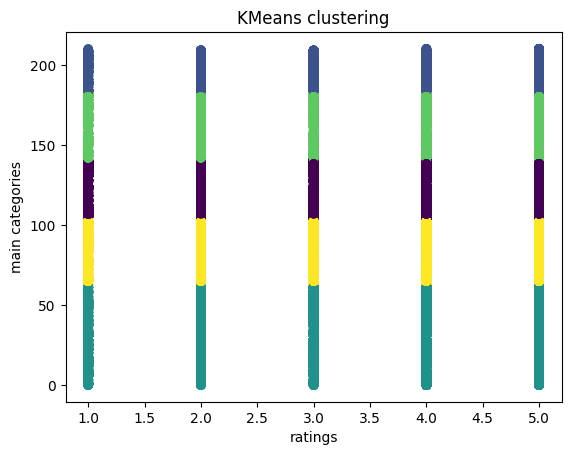

In [239]:
plt.scatter(training_df.iloc[:,0], training_df.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('ratings'); plt.ylabel('main categories');

## Clustering for Restaurants

In [166]:
restaurants_training_df = restaurants[['name', 'reviews', 'cuisine', 'main_rating', 'review_photos']].copy()

In [67]:
label_encoder = LabelEncoder()
restaurants_training_df['cuisine_encoded'] = label_encoder.fit_transform(restaurants_training_df['cuisine'])

In [167]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [168]:
ohe.fit(restaurants_training_df[['cuisine']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [169]:
ohe.categories_

[array(['African', 'American', 'Asian', 'Australian', 'Bakery', 'Bar',
        'Barbecue', 'Buffet', 'Cafe', 'Casual', 'Catering', 'Chinese',
        'Dessert', 'Eastern European', 'European', 'Event', 'Family',
        'Fast food', 'Fine dining', 'French', 'Fusion', 'German', 'Halal',
        'Health food', 'Indian', 'International', 'Italian', 'Japanese',
        'Korean', 'Latin American', 'Malaysian', 'Mediterranean',
        'Mexican', 'Middle Eastern', 'Modern', 'Seafood', 'Singaporean',
        'Spanish', 'Western'], dtype=object)]

In [170]:
restaurants_training_df[ohe.get_feature_names_out()] = ohe.transform(restaurants_training_df[['cuisine']])

In [171]:
restaurants_training_df.head()

,name,reviews,cuisine,main_rating,review_photos,cuisine_African,cuisine_American,cuisine_Asian,cuisine_Australian,cuisine_Bakery,...,cuisine_Latin American,cuisine_Malaysian,cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Modern,cuisine_Seafood,cuisine_Singaporean,cuisine_Spanish,cuisine_Western
0,Red House Seafood Grand Copthorne,1110,Seafood,4.2,['https://lh5.googleusercontent.com/p/AF1QipNp...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Red House Seafood Nanyang (Clarke Quay),730,Seafood,4.1,['https://lh5.googleusercontent.com/p/AF1QipMe...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Red House Seafood at Esplanade,186,Seafood,4.4,['https://lh5.googleusercontent.com/p/AF1QipOJ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Red Sparrow,496,Asian,4.0,['https://lh5.googleusercontent.com/p/AF1QipO8...,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Rempapa,551,Singaporean,4.2,['https://lh5.googleusercontent.com/p/AF1QipPd...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

In [69]:
restaurants_training_df['review_photos'] = restaurants_training_df['review_photos'].apply(safe_literal_eval)

In [70]:
restaurants_training_df['review_photos'] = restaurants_training_df['review_photos'].apply(lambda x: len(x))

In [71]:
restaurants_training_df

,name,reviews,cuisine,main_rating,review_photos,cuisine_encoded
0,Red House Seafood Grand Copthorne,1110,Seafood,4.2,45,36
1,Red House Seafood Nanyang (Clarke Quay),730,Seafood,4.1,55,36
2,Red House Seafood at Esplanade,186,Seafood,4.4,48,36
3,Red Sparrow,496,Asian,4.0,47,2
4,Red Star Restaurant,3725,Chinese,3.7,49,11
...,...,...,...,...,...,...
4504,Hua Ting Restaurant,721,Chinese,4.1,39,11
4505,Hua Ting Steamboat,70,Asian,4.2,45,2
4506,Hualong Fishhead Steamboat,173,Asian,3.8,28,2
4507,Hualong Fishhead Steamboat,45,Chinese,3.8,53,11


In [148]:
restaurants_training_df.cuisine.nunique()

41

In [53]:
sscaler = StandardScaler()

In [72]:
restaurants_training_df[['reviews_scaled', 'main_rating_scaled', 'review_photos_scaled']] = sscaler.fit_transform(restaurants_training_df[['reviews', 'main_rating', 'review_photos']])

In [157]:
restaurants_training_df

,name,reviews,main_rating,review_photos,cuisine_encoded,reviews_scaled,main_rating_scaled,review_photos_scaled,cluster,cuisine_African,...,cuisine_Malaysian,cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Modern,cuisine_Seafood,cuisine_Singaporean,cuisine_Spanish,cuisine_Street food,cuisine_Western
0,Red House Seafood Grand Copthorne,1110,4.2,45,36,0.387657,-0.308735,0.186900,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Red House Seafood Nanyang (Clarke Quay),730,4.1,55,36,0.057433,-0.617552,0.626712,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Red House Seafood at Esplanade,186,4.4,48,36,-0.415310,0.308897,0.318843,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Red Sparrow,496,4.0,47,2,-0.145916,-0.926368,0.274862,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Red Star Restaurant,3725,3.7,49,11,2.660123,-1.852816,0.362825,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,Hua Ting Restaurant,721,4.1,39,11,0.049612,-0.617552,-0.076987,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4505,Hua Ting Steamboat,70,4.2,45,2,-0.516115,-0.308735,0.186900,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4506,Hualong Fishhead Steamboat,173,3.8,28,2,-0.426607,-1.544000,-0.560780,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4507,Hualong Fishhead Steamboat,45,3.8,53,11,-0.537840,-1.544000,0.538749,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
restaurants_training_df_processed = restaurants_training_df.drop(columns=['name', 'reviews', 'main_rating', 'review_photos', 'cuisine'])

In [197]:
km_restaurants2 = KMeans(n_clusters=30, n_init='auto')
km_restaurants2.fit(restaurants_training_df_processed)

KMeans(n_clusters=30, n_init='auto')

In [198]:
restaurants_training_df['cluster2'] = km_restaurants2.labels_

In [199]:
cluster_groups2 = restaurants_training_df.groupby('cluster2')['name'].apply(list).to_dict()

In [200]:
restaurants_training_df

,name,reviews,cuisine,main_rating,review_photos,cuisine_African,cuisine_American,cuisine_Asian,cuisine_Australian,cuisine_Bakery,...,cuisine_Malaysian,cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Modern,cuisine_Seafood,cuisine_Singaporean,cuisine_Spanish,cuisine_Western,cluster2
0,Red House Seafood Grand Copthorne,1110,Seafood,4.2,['https://lh5.googleusercontent.com/p/AF1QipNp...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
1,Red House Seafood Nanyang (Clarke Quay),730,Seafood,4.1,['https://lh5.googleusercontent.com/p/AF1QipMe...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
2,Red House Seafood at Esplanade,186,Seafood,4.4,['https://lh5.googleusercontent.com/p/AF1QipOJ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
3,Red Sparrow,496,Asian,4.0,['https://lh5.googleusercontent.com/p/AF1QipO8...,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,Rempapa,551,Singaporean,4.2,['https://lh5.googleusercontent.com/p/AF1QipPd...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,Hopscotch (Gardens by the Bay),462,Bar,4.5,['https://lh5.googleusercontent.com/p/AF1QipOR...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4501,Turkish Lezzet House,333,Middle Eastern,4.6,['https://lh5.googleusercontent.com/p/AF1QipO4...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14
4503,House of Seafood Riverwalk 螃蟹之家河畔店,771,Seafood,4.3,['https://lh5.googleusercontent.com/p/AF1QipNH...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13
4504,Hua Ting Restaurant,721,Chinese,4.1,['https://lh5.googleusercontent.com/p/AF1QipOQ...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [201]:
restaurants_training_df['cluster2'].nunique()

30

In [202]:
for i in range(restaurants_training_df['cluster2'].nunique()):
    cluster_instance = restaurants_training_df[restaurants_training_df['cluster2'] == i]
    print(f"CLUSTER {i}:\n{cluster_instance['cuisine'].value_counts()}\n\n{cluster_instance['main_rating'].value_counts()}\n\n")

CLUSTER 0:
Buffet    26
Name: cuisine, dtype: int64

4.2    4
4.4    4
4.0    3
4.7    3
4.3    3
4.1    3
3.8    2
4.6    2
4.5    1
3.9    1
Name: main_rating, dtype: int64


CLUSTER 1:
Asian    463
Name: cuisine, dtype: int64

4.3    61
4.5    60
4.2    53
4.4    52
4.6    46
4.1    44
4.0    41
4.7    31
4.8    21
3.9    20
3.7    17
3.8    11
4.9     6
Name: main_rating, dtype: int64


CLUSTER 2:
Chinese    424
Name: cuisine, dtype: int64

4.1    68
4.2    59
4.3    58
4.4    42
4.0    34
4.5    33
3.9    26
3.8    26
4.6    23
4.7    22
4.8    17
3.7    11
4.9     3
5.0     2
Name: main_rating, dtype: int64


CLUSTER 3:
Cafe    285
Name: cuisine, dtype: int64

4.0    36
4.2    34
4.3    33
4.4    33
4.1    29
3.9    23
4.5    21
4.6    16
4.8    14
3.7    14
4.7    13
3.8    13
4.9     6
Name: main_rating, dtype: int64


CLUSTER 4:
Indian    184
Name: cuisine, dtype: int64

4.0    29
4.3    27
4.2    24
4.1    23
4.4    18
3.9    14
4.6    10
4.7     9
3.8     8
3.7     8
4.5    

In [74]:
km_restaurants = KMeans(n_clusters=5, n_init='auto')
km_restaurants.fit(restaurants_training_df[['reviews_scaled', 'cuisine_encoded', 'main_rating_scaled', 'review_photos_scaled']])

KMeans(n_clusters=5, n_init='auto')

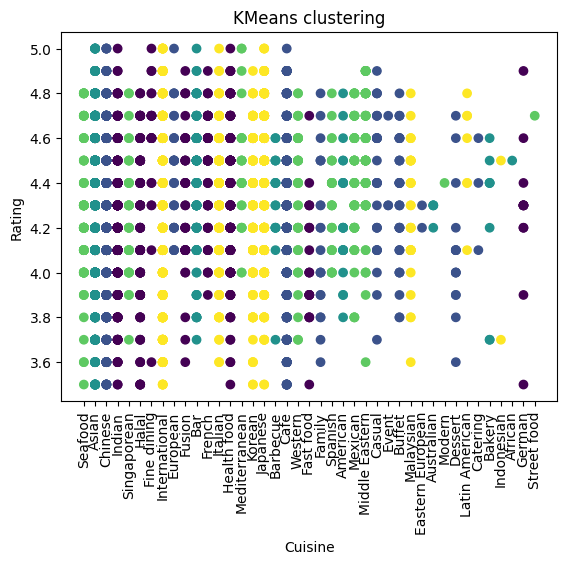

In [78]:
plt.scatter(restaurants_training_df.iloc[:,2], restaurants_training_df.iloc[:,3], c=km_restaurants.labels_)
plt.title('KMeans clustering')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.xticks(rotation=90);

In [79]:
restaurants_training_df['cluster'] = km_restaurants.labels_

In [80]:
cluster_groups = restaurants_training_df.groupby('cluster')['name'].apply(list).to_dict()

In [139]:
restaurants_training_df[restaurants_training_df['cluster'] == 4].sort_values(by='main_rating').head(30)

,name,reviews,cuisine,main_rating,review_photos,cuisine_encoded,reviews_scaled,main_rating_scaled,review_photos_scaled,cluster
3709,Bornga Singapore @ Suntec City,423,Korean,3.5,56,29,-0.209354,-2.470449,0.670693,4
2918,Men-Men Tei,36,Japanese,3.5,17,28,-0.545661,-2.470449,-1.044573,4
3641,Ichiban Bento (Tiong Bahru Plaza),26,Japanese,3.5,2,28,-0.554352,-2.470449,-1.704291,4
1405,Penang Savour - Traditional Penang Food,133,International,3.5,19,26,-0.461367,-2.470449,-0.956611,4
593,Sichuan Chef,27,International,3.5,8,26,-0.553483,-2.470449,-1.440404,4
2579,JIN Kimchi Express (Ghim Moh),65,Korean,3.5,8,29,-0.520460,-2.470449,-1.440404,4
4420,Hao Lai Wu Steamboat BBQ 好来屋火锅烧烤,333,International,3.5,56,26,-0.287565,-2.470449,0.670693,4
3379,Rabbit Brand Seafood Delicacies,76,International,3.5,28,26,-0.510901,-2.470449,-0.560780,4
3243,Penang Savour,139,International,3.6,38,26,-0.456153,-2.161633,-0.120968,4
144,Saizeriya - i12 Katong,37,Italian,3.6,63,27,-0.544792,-2.161633,0.978561,4


In [140]:
restaurants_training_df[restaurants_training_df['cluster'] == 4].shape

(992, 10)

In [142]:
restaurants_training_df[restaurants_training_df['cluster'] == 4]['cuisine'].value_counts()

International     326
Japanese          295
Italian           172
Korean            158
Malaysian          32
Latin American      7
Indonesian          2
Name: cuisine, dtype: int64

In [143]:
restaurants_training_df[restaurants_training_df['cluster'] == 1]['cuisine'].value_counts()

Chinese             532
Cafe                376
Buffet               35
European             31
Casual               30
Family               20
Dessert              15
Event                 3
Catering              3
Eastern European      2
Name: cuisine, dtype: int64

In [144]:
restaurants_training_df[restaurants_training_df['cluster'] == 2]['cuisine'].value_counts()

Asian         587
Bar           110
American       22
Barbecue       17
Bakery          8
Australian      4
African         1
Name: cuisine, dtype: int64

In [145]:
restaurants_training_df[restaurants_training_df['cluster'] == 3]['cuisine'].value_counts()

Seafood           89
Middle Eastern    73
Mexican           54
Western           40
Singaporean       34
Spanish           30
Mediterranean     28
Modern             1
Street food        1
Name: cuisine, dtype: int64

In [147]:
restaurants_training_df[restaurants_training_df['cluster'] == 0]['cuisine'].value_counts()

Indian         244
Health food    179
Halal          102
French          67
Fusion          40
Fine dining     24
Fast food       21
German          12
Name: cuisine, dtype: int64